<a href="https://colab.research.google.com/github/Phantasm320/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = [-16, -9, -4, -1, 0, 1, 4, 9, 16] ; x

[-16, -9, -4, -1, 0, 1, 4, 9, 16]

<function matplotlib.pyplot.plot>

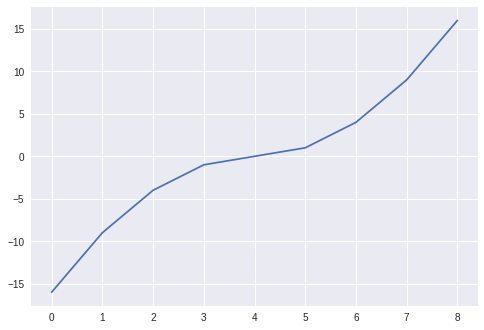

In [8]:
plt.plot(x);
plt.plot

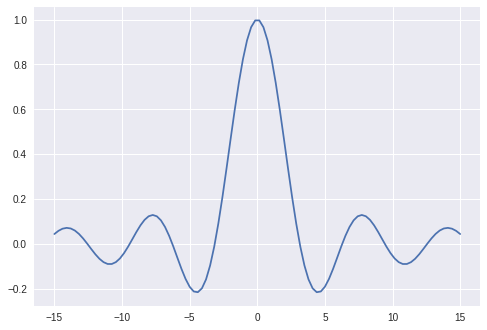

In [6]:
x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = np.sin(x)/x # computing the values of sin(x)/x

plt.plot(x,y) # sin(x)/x
plt.show()

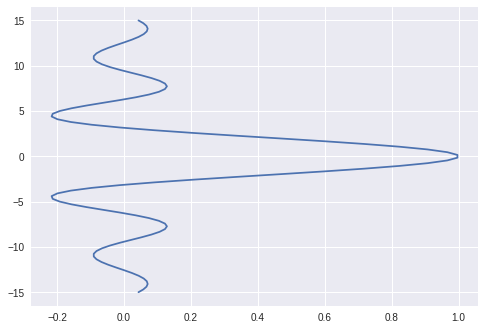

In [14]:
from matplotlib import transforms

x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = np.sin(x)/x # computing the values of sin(x)/x

# first of all, the base transformation of the data points is needed
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)

plt.plot(x,y, transform= rot+base)

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

 If a horizontal line intersects a function's graph more than once, then the function is not one-to-one

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is not a function because the x-value repeats itself. It is not one-to-one

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

- m domain = 3
- m codomain = 3
- n domain = 4
- n codomain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

No

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [32]:
x_1 = np.array([1, 0])
x_2 = np.array([0, 1])
x = np.array([1, 3])
y = np.array([2, -1])
t = np.array([[1, 3], [2, -1]]); t
rand = np.array([1, 3])
p1 = x_1 * x
print(p1)
p2 = x_2 * y
print(p2)


[1 0]
[ 0 -1]


In [33]:
t = np.array([[1, 0], [0, -1]]) ; t

array([[ 1,  0],
       [ 0, -1]])

array([ 3, -2])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [35]:
v = np.array([3, 2])
np.dot(t, v)

array([ 3, -2])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- You cannot always visualize them
- Can overfit your data

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

if you expect to be able to detect reasonable-size effects with reasonable power, you need 10-20 observations per parameter (covariate) estimated. 

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scaler.transform(df)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [44]:
print(scaled_data.shape)
print(x_pca.shape)

(150, 4)
(150, 2)


Text(0,0.5,'Second Principle Component')

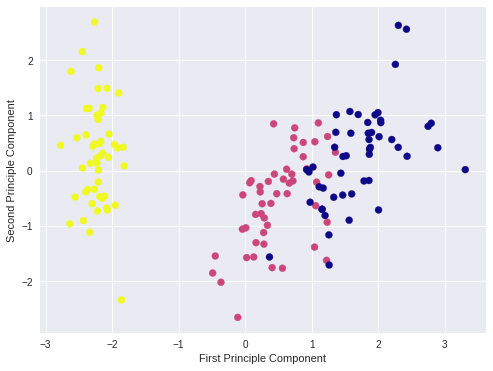

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=iris['target'], cmap='plasma_r')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)

In [0]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

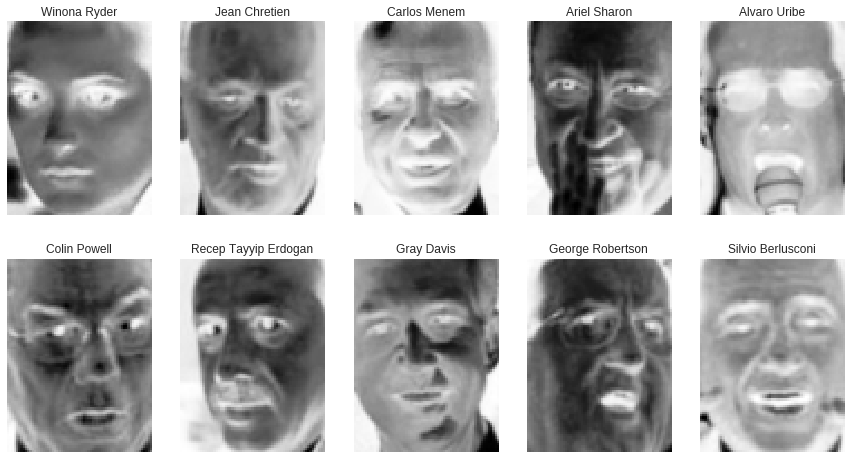

In [54]:
fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [0]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

In [0]:
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                   stratify=y_people, random_state=0)
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


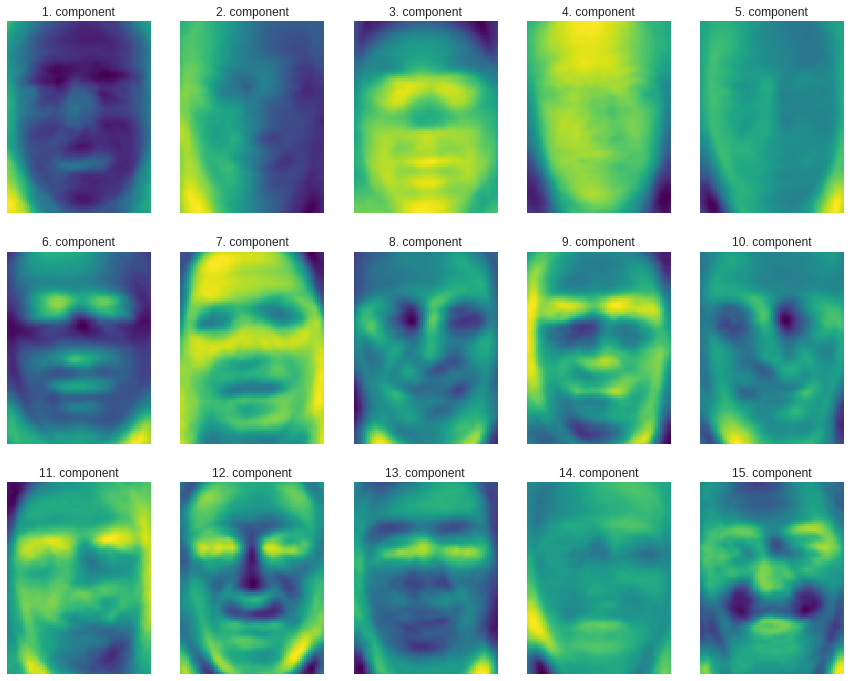

In [64]:
fix, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape),
           cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))